# Predicting churn with a decision tree

*Given the following dataset, can you create a decision tree to predict customer churn? For simplicity, you can set the maximum depth of the decision tree to 4. For the purpose of this exercise, you do not need to optimize the model.*

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, \
precision_score, recall_score, roc_auc_score, classification_report, plot_confusion_matrix 

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

## Load and Preprocess Data

In [2]:
# Import data
df = pd.read_csv('Data/teleco_user_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Get shape
df.shape

(7043, 21)

There are 7043 rows of data and 21 columns, one of which is the target `Churn`.

In [4]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

There do not appear to be any missing values.

In [5]:
# Use describe to get summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The `SeniorCitizen` feature should be viewed as a categorical variable, as it is a binary yes or no value.

In [6]:
# Check for duplicates
df.duplicated().any()

False

There do not appear to be any duplicates.

## Explore Data

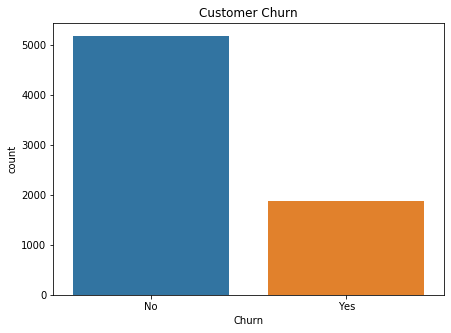

In [7]:
# Plot distribution of target variable
plt.figure(figsize = (7,5))
sns.countplot(df['Churn'])
plt.xlabel('Churn')
plt.title('Customer Churn')
plt.show()

In [8]:
# Get normalized value counts
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

We notice that we are dealing with imbalanced classes, with 73% of entries representing customers who did not churn.

## Model Data

In [17]:
# Seperate features from target

X = df.drop(['customerID','Churn'], axis = 1)
y = df['Churn'].copy()

# Map y values to 1 and 0 
y = y.map(lambda x: 1 if x == 'Yes' else 0)
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

print(f'Train Features Shape: {X_train.shape}')
print(f'Train Target Shape: {y_train.shape}')
print(f'Test Features Shape: {X_test.shape}')
print(f'Test Target Shape: {y_test.shape}')

Train Features Shape: (5634, 19)
Train Target Shape: (5634,)
Test Features Shape: (1409, 19)
Test Target Shape: (1409,)


In [19]:
# Instantiate Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)

# Fit classifier
dt.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'